In [72]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Glassdoor Gender Pay Gap.csv')
# Display the first few rows of the DataFrame
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [73]:
# Create a new column 'Salary' which is the sum of 'BasePay' and 'Bonus'
df['Salary'] = df['BasePay'] + df['Bonus']
# Display the first few rows to verify that the 'Salary' column has been added correctly
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,Salary
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


In [74]:
# Check for missing values in the 'Salary', 'Education', and 'Gender' columns
missing_values = df[['Salary', 'Education', 'Gender']].isnull().sum()

missing_values


Salary       0
Education    0
Gender       0
dtype: int64

In [75]:
# Check the data types of the 'Salary', 'Education', and 'Gender' columns
data_types = df[['Salary', 'Education', 'Gender']].dtypes

data_types


Salary        int64
Education    object
Gender       object
dtype: object


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


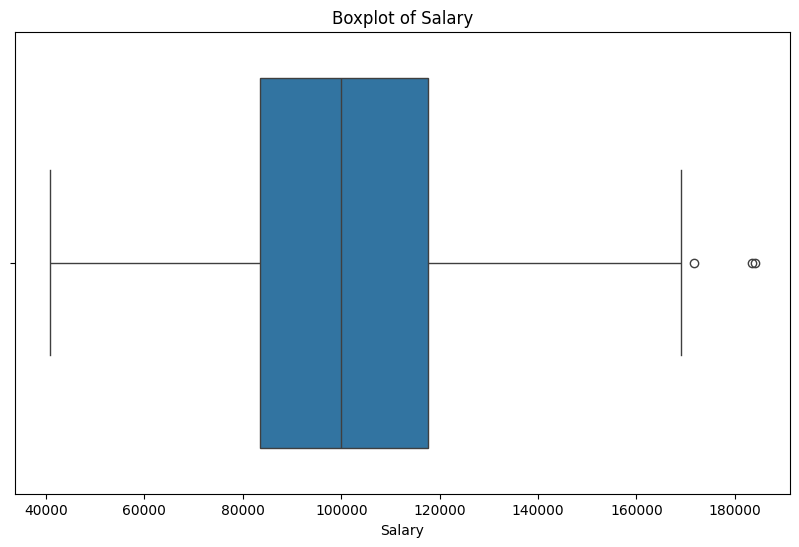

count      1000.000000
mean     100939.814000
std       25156.599655
min       40828.000000
25%       83443.000000
50%      100047.000000
75%      117656.000000
max      184010.000000
Name: Salary, dtype: float64

In [76]:
%pip install matplotlib
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a boxplot to visualize the distribution of 'Salary' and identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Salary'])
plt.title('Boxplot of Salary')
plt.xlabel('Salary')
plt.show()

# Calculate some statistics to better understand the 'Salary' distribution
salary_stats = df['Salary'].describe()

salary_stats


In [77]:
# Check the unique values in the 'Education' column to understand its current ordering
unique_education_values = df['Education'].unique()

unique_education_values


array(['College', 'PhD', 'Masters', 'High School'], dtype=object)

In [78]:
# Define a logical order for the education levels
education_order = ['High School', 'College', 'Masters', 'PhD']

# Convert the 'Education' column to a categorical type with the defined order
df['Education'] = pd.Categorical(df['Education'], categories=education_order, ordered=True)

# Verify the change by checking the data type and unique values again
education_dtype = df['Education'].dtype
unique_education_values_sorted = df['Education'].unique()

education_dtype, sorted(unique_education_values_sorted)

(CategoricalDtype(categories=['High School', 'College', 'Masters', 'PhD'], ordered=True, categories_dtype=object),
 ['College', 'High School', 'Masters', 'PhD'])

In [79]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,Salary
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


In [80]:
# Import the necessary library
import pandas as pd

# Load the CSV file into a DataFrame
csv_file_path = 'Glassdoor Gender Pay Gap.csv'
df = pd.read_csv(csv_file_path)

# Create a new column 'Salary' which is the sum of 'BasePay' and 'Bonus'
df['Salary'] = df['BasePay'] + df['Bonus']

# Filter the DataFrame to only keep the 'Education' and 'Salary' columns
filtered_df = df[['Education', 'Salary']]

# Display the first few rows of the filtered DataFrame
filtered_df.head()


,Education,Salary
0,College,52301
1,College,119604
2,PhD,99476
3,Masters,118234
4,Masters,108783


In [81]:
# Define the education order for sorting
education_order = ["High School", "College", "Masters", "PhD"]

# Sort the DataFrame according to the education order
filtered_df['Education'] = pd.Categorical(filtered_df['Education'], categories=education_order, ordered=True)
sorted_df = filtered_df.sort_values('Education')

# Display the first few rows of the sorted DataFrame to verify
sorted_df.head()


/var/folders/7w/hyls2fc56q36tpl1bsjwx6340000gn/T/ipykernel_76181/4068393855.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Education'] = pd.Categorical(filtered_df['Education'], categories=education_order, ordered=True)


,Education,Salary
499,High School,125671
236,High School,89272
235,High School,73575
234,High School,57952
667,High School,98382


In [82]:
sorted_df.to_csv('Glassdoor_Gender_Pay_Gap_Processed.csv', index=False)

In [83]:
# Convert the filtered DataFrame to JSON format
json_file_path = 'Filtered_Education_Salary.json'
sorted_df.to_json(json_file_path, orient='records')

# Verify by reading the first few records from the saved JSON file
with open(json_file_path, 'r') as f:
    json_preview = f.read(1000)  # Read the first 1000 characters to get an idea of the content

json_preview

'[{"Education":"High School","Salary":125671},{"Education":"High School","Salary":89272},{"Education":"High School","Salary":73575},{"Education":"High School","Salary":57952},{"Education":"High School","Salary":98382},{"Education":"High School","Salary":112047},{"Education":"High School","Salary":73500},{"Education":"High School","Salary":64148},{"Education":"High School","Salary":84795},{"Education":"High School","Salary":76841},{"Education":"High School","Salary":105001},{"Education":"High School","Salary":105722},{"Education":"High School","Salary":71193},{"Education":"High School","Salary":112472},{"Education":"High School","Salary":129208},{"Education":"High School","Salary":98725},{"Education":"High School","Salary":58835},{"Education":"High School","Salary":127356},{"Education":"High School","Salary":75829},{"Education":"High School","Salary":93157},{"Education":"High School","Salary":111245},{"Education":"High School","Salary":132316},{"Education":"High School","Salary":93014},